In [1]:
import os
import sys
sys.path.append('common')
import util, audio_preprocessing

import shutil
import numpy as np
import keras
import keras.backend as K
from keras.callbacks import ModelCheckpoint, Callback, TensorBoard
from matplotlib import pyplot as plt
%matplotlib inline
from cyclic_lr import CyclicLR

from dataset import SingleDataset, MultiDataset
from model import model_mlt_cnn_alexnet

TRY = 'MIX5'
LOG_DIR = './%slog' % TRY
SCD_PREFIX = 'scd_'
USD_PREFIX = 'usd_'

batch_size = 32
epochs = 150

scd = SingleDataset(SCD_PREFIX,
                   util.load_txt_list(os.path.join('.', SCD_PREFIX+'classes.txt')),
                   batch_size)
usd = SingleDataset(USD_PREFIX,
                   ['air_conditioner',  'car_horn', 'children_playing', 'dog_bark', 'drilling',
                    'engine_idling', 'gun_shot','jackhammer', 'siren', 'street_music'],
                   batch_size)


Using TensorFlow backend.


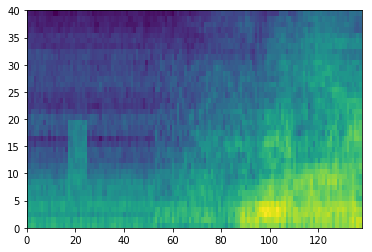

In [2]:
multi = MultiDataset([scd, usd], [0.6, 0.4])

# Confirmation
def plot_dataset(X, n=1):
    for i in range(n):
        x = X[i]
        plt.pcolormesh(x[..., -1])
        plt.show()
X = next(multi.train_generator)[0]
plot_dataset(X)

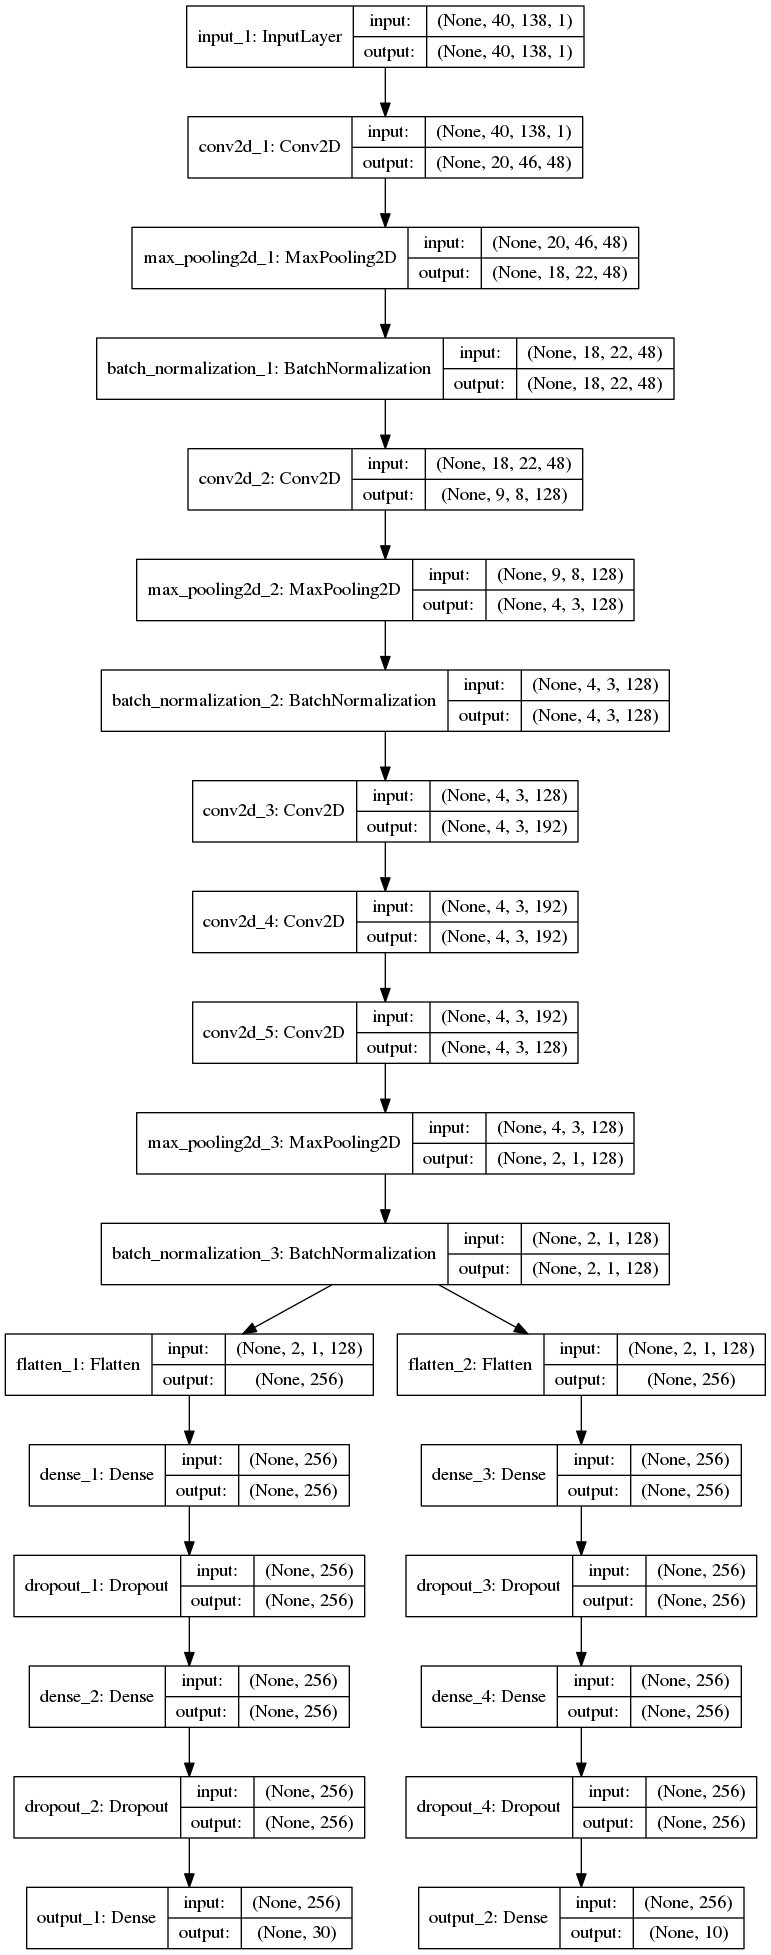

In [3]:
model = model_mlt_cnn_alexnet(multi.input_shape(), multi.ys_classes())
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(lr=0.0001),
              metrics=['accuracy'])
#model.summary()
from keras.utils import plot_model
plot_model(model, to_file='structure%s.png' % TRY, show_shapes=True)
from IPython.display import Image
Image(filename='structure%s.png' % TRY) 

In [6]:
callbacks = [
    CyclicLR(base_lr=0.00007, max_lr=0.0007, step_size=multi.train_steps_per_epoch, mode='triangular'),
    ModelCheckpoint('model%s.h5' % TRY,
                monitor='val_output_1_acc',
                verbose=1,
                save_best_only=True,
                save_weights_only=True),
     keras.callbacks.TensorBoard(log_dir=LOG_DIR, histogram_freq=0, write_graph=True, write_images=True)
]

# Clean up log
shutil.rmtree(LOG_DIR, ignore_errors=True)

model.fit_generator(multi.train_generator,
                    steps_per_epoch=multi.train_steps_per_epoch,
                    epochs=epochs,
                    validation_data=multi.valid_generator, 
                    validation_steps=multi.valid_steps_per_epoch,
                    callbacks=callbacks)

Epoch 1/150
1595/1596 [============================>.] - ETA: 0s - loss: 2.9727 - output_1_loss: 2.0644 - output_2_loss: 0.9083 - output_1_acc: 0.0466 - output_2_acc: 0.1689
Epoch 00001: val_output_1_acc improved from -inf to 0.08295, saving model to modelMIX5.h5
1596/1596 [==============================] - 73s 46ms/step - loss: 2.9726 - output_1_loss: 2.0643 - output_2_loss: 0.9083 - output_1_acc: 0.0466 - output_2_acc: 0.1689 - val_loss: 2.7740 - val_output_1_loss: 1.9213 - val_output_2_loss: 0.8526 - val_output_1_acc: 0.0829 - val_output_2_acc: 0.2459
Epoch 2/150
1595/1596 [============================>.] - ETA: 0s - loss: 2.7988 - output_1_loss: 1.9468 - output_2_loss: 0.8519 - output_1_acc: 0.0862 - output_2_acc: 0.2364
Epoch 00002: val_output_1_acc improved from 0.08295 to 0.18939, saving model to modelMIX5.h5
1596/1596 [==============================] - 73s 45ms/step - loss: 2.7988 - output_1_loss: 1.9469 - output_2_loss: 0.8519 - output_1_acc: 0.0862 - output_2_acc: 0.2364 - va

1595/1596 [============================>.] - ETA: 0s - loss: 2.2213 - output_1_loss: 1.4518 - output_2_loss: 0.7695 - output_1_acc: 0.4608 - output_2_acc: 0.3648
Epoch 00016: val_output_1_acc improved from 0.77067 to 0.78852, saving model to modelMIX5.h5
1596/1596 [==============================] - 73s 46ms/step - loss: 2.2213 - output_1_loss: 1.4519 - output_2_loss: 0.7695 - output_1_acc: 0.4608 - output_2_acc: 0.3648 - val_loss: 1.1735 - val_output_1_loss: 0.5069 - val_output_2_loss: 0.6666 - val_output_1_acc: 0.7885 - val_output_2_acc: 0.4341
Epoch 17/150
1594/1596 [============================>.] - ETA: 0s - loss: 2.1985 - output_1_loss: 1.4298 - output_2_loss: 0.7687 - output_1_acc: 0.4779 - output_2_acc: 0.3652
Epoch 00017: val_output_1_acc did not improve
1596/1596 [==============================] - 73s 46ms/step - loss: 2.1986 - output_1_loss: 1.4298 - output_2_loss: 0.7687 - output_1_acc: 0.4778 - output_2_acc: 0.3652 - val_loss: 1.3176 - val_output_1_loss: 0.6270 - val_output

Epoch 47/150
1595/1596 [============================>.] - ETA: 0s - loss: 1.9790 - output_1_loss: 1.2511 - output_2_loss: 0.7279 - output_1_acc: 0.6005 - output_2_acc: 0.4242
Epoch 00047: val_output_1_acc did not improve
1596/1596 [==============================] - 73s 46ms/step - loss: 1.9789 - output_1_loss: 1.2510 - output_2_loss: 0.7279 - output_1_acc: 0.6006 - output_2_acc: 0.4242 - val_loss: 1.0812 - val_output_1_loss: 0.4324 - val_output_2_loss: 0.6488 - val_output_1_acc: 0.8274 - val_output_2_acc: 0.4334
Epoch 48/150
1594/1596 [============================>.] - ETA: 0s - loss: 1.9882 - output_1_loss: 1.2604 - output_2_loss: 0.7278 - output_1_acc: 0.5956 - output_2_acc: 0.4217
Epoch 00048: val_output_1_acc did not improve
1596/1596 [==============================] - 73s 46ms/step - loss: 1.9883 - output_1_loss: 1.2605 - output_2_loss: 0.7278 - output_1_acc: 0.5956 - output_2_acc: 0.4217 - val_loss: 0.9544 - val_output_1_loss: 0.3358 - val_output_2_loss: 0.6186 - val_output_1_acc

Epoch 63/150
1594/1596 [============================>.] - ETA: 0s - loss: 1.9350 - output_1_loss: 1.2191 - output_2_loss: 0.7159 - output_1_acc: 0.6186 - output_2_acc: 0.4402
Epoch 00063: val_output_1_acc did not improve
1596/1596 [==============================] - 73s 46ms/step - loss: 1.9351 - output_1_loss: 1.2192 - output_2_loss: 0.7159 - output_1_acc: 0.6185 - output_2_acc: 0.4401 - val_loss: 1.0160 - val_output_1_loss: 0.3364 - val_output_2_loss: 0.6796 - val_output_1_acc: 0.8648 - val_output_2_acc: 0.4100
Epoch 64/150
1594/1596 [============================>.] - ETA: 0s - loss: 1.9419 - output_1_loss: 1.2229 - output_2_loss: 0.7189 - output_1_acc: 0.6229 - output_2_acc: 0.4376
Epoch 00064: val_output_1_acc did not improve
1596/1596 [==============================] - 73s 46ms/step - loss: 1.9416 - output_1_loss: 1.2228 - output_2_loss: 0.7189 - output_1_acc: 0.6230 - output_2_acc: 0.4377 - val_loss: 0.9035 - val_output_1_loss: 0.3100 - val_output_2_loss: 0.5935 - val_output_1_acc

Epoch 79/150
1594/1596 [============================>.] - ETA: 0s - loss: 1.9071 - output_1_loss: 1.1990 - output_2_loss: 0.7081 - output_1_acc: 0.6370 - output_2_acc: 0.4510
Epoch 00079: val_output_1_acc did not improve
1596/1596 [==============================] - 73s 46ms/step - loss: 1.9071 - output_1_loss: 1.1989 - output_2_loss: 0.7082 - output_1_acc: 0.6370 - output_2_acc: 0.4510 - val_loss: 0.9837 - val_output_1_loss: 0.3491 - val_output_2_loss: 0.6346 - val_output_1_acc: 0.8607 - val_output_2_acc: 0.4506
Epoch 80/150
1594/1596 [============================>.] - ETA: 0s - loss: 1.9191 - output_1_loss: 1.2085 - output_2_loss: 0.7106 - output_1_acc: 0.6326 - output_2_acc: 0.4508
Epoch 00080: val_output_1_acc did not improve
1596/1596 [==============================] - 73s 46ms/step - loss: 1.9190 - output_1_loss: 1.2083 - output_2_loss: 0.7106 - output_1_acc: 0.6327 - output_2_acc: 0.4508 - val_loss: 0.8898 - val_output_1_loss: 0.2990 - val_output_2_loss: 0.5908 - val_output_1_acc

Epoch 95/150
1594/1596 [============================>.] - ETA: 0s - loss: 1.8841 - output_1_loss: 1.1819 - output_2_loss: 0.7021 - output_1_acc: 0.6489 - output_2_acc: 0.4631
Epoch 00095: val_output_1_acc did not improve
1596/1596 [==============================] - 74s 46ms/step - loss: 1.8842 - output_1_loss: 1.1820 - output_2_loss: 0.7021 - output_1_acc: 0.6489 - output_2_acc: 0.4631 - val_loss: 0.9563 - val_output_1_loss: 0.3428 - val_output_2_loss: 0.6135 - val_output_1_acc: 0.8676 - val_output_2_acc: 0.4705
Epoch 96/150
1595/1596 [============================>.] - ETA: 0s - loss: 1.8899 - output_1_loss: 1.1857 - output_2_loss: 0.7043 - output_1_acc: 0.6467 - output_2_acc: 0.4604
Epoch 00096: val_output_1_acc improved from 0.89086 to 0.89381, saving model to modelMIX5.h5
1596/1596 [==============================] - 73s 46ms/step - loss: 1.8898 - output_1_loss: 1.1857 - output_2_loss: 0.7042 - output_1_acc: 0.6468 - output_2_acc: 0.4605 - val_loss: 0.8643 - val_output_1_loss: 0.2770

Epoch 111/150
1595/1596 [============================>.] - ETA: 0s - loss: 1.8713 - output_1_loss: 1.1736 - output_2_loss: 0.6977 - output_1_acc: 0.6556 - output_2_acc: 0.4674
Epoch 00111: val_output_1_acc did not improve
1596/1596 [==============================] - 73s 46ms/step - loss: 1.8712 - output_1_loss: 1.1736 - output_2_loss: 0.6976 - output_1_acc: 0.6555 - output_2_acc: 0.4674 - val_loss: 0.9293 - val_output_1_loss: 0.3288 - val_output_2_loss: 0.6005 - val_output_1_acc: 0.8713 - val_output_2_acc: 0.4877
Epoch 112/150
1594/1596 [============================>.] - ETA: 0s - loss: 1.8779 - output_1_loss: 1.1789 - output_2_loss: 0.6990 - output_1_acc: 0.6489 - output_2_acc: 0.4693
Epoch 00112: val_output_1_acc did not improve
1596/1596 [==============================] - 74s 46ms/step - loss: 1.8779 - output_1_loss: 1.1789 - output_2_loss: 0.6990 - output_1_acc: 0.6489 - output_2_acc: 0.4693 - val_loss: 0.8794 - val_output_1_loss: 0.2860 - val_output_2_loss: 0.5934 - val_output_1_a

Epoch 127/150
1594/1596 [============================>.] - ETA: 0s - loss: 1.8573 - output_1_loss: 1.1649 - output_2_loss: 0.6923 - output_1_acc: 0.6581 - output_2_acc: 0.4750
Epoch 00127: val_output_1_acc did not improve
1596/1596 [==============================] - 73s 46ms/step - loss: 1.8573 - output_1_loss: 1.1649 - output_2_loss: 0.6924 - output_1_acc: 0.6581 - output_2_acc: 0.4750 - val_loss: 0.9059 - val_output_1_loss: 0.2740 - val_output_2_loss: 0.6319 - val_output_1_acc: 0.8887 - val_output_2_acc: 0.4513
Epoch 128/150
1594/1596 [============================>.] - ETA: 0s - loss: 1.8608 - output_1_loss: 1.1675 - output_2_loss: 0.6932 - output_1_acc: 0.6609 - output_2_acc: 0.4726
Epoch 00128: val_output_1_acc improved from 0.89664 to 0.89869, saving model to modelMIX5.h5
1596/1596 [==============================] - 73s 46ms/step - loss: 1.8608 - output_1_loss: 1.1677 - output_2_loss: 0.6931 - output_1_acc: 0.6608 - output_2_acc: 0.4727 - val_loss: 0.8352 - val_output_1_loss: 0.25

Epoch 143/150
1594/1596 [============================>.] - ETA: 0s - loss: 1.8412 - output_1_loss: 1.1515 - output_2_loss: 0.6896 - output_1_acc: 0.6675 - output_2_acc: 0.4819
Epoch 00143: val_output_1_acc did not improve
1596/1596 [==============================] - 73s 46ms/step - loss: 1.8412 - output_1_loss: 1.1516 - output_2_loss: 0.6897 - output_1_acc: 0.6675 - output_2_acc: 0.4817 - val_loss: 0.8802 - val_output_1_loss: 0.2904 - val_output_2_loss: 0.5898 - val_output_1_acc: 0.8839 - val_output_2_acc: 0.4983
Epoch 144/150
1595/1596 [============================>.] - ETA: 0s - loss: 1.8492 - output_1_loss: 1.1576 - output_2_loss: 0.6916 - output_1_acc: 0.6645 - output_2_acc: 0.4772
Epoch 00144: val_output_1_acc did not improve
1596/1596 [==============================] - 73s 46ms/step - loss: 1.8493 - output_1_loss: 1.1576 - output_2_loss: 0.6916 - output_1_acc: 0.6645 - output_2_acc: 0.4772 - val_loss: 0.8509 - val_output_1_loss: 0.2677 - val_output_2_loss: 0.5832 - val_output_1_a

## Evaluate per dataset

In [11]:
model.load_weights('model%s.h5' % TRY)
multi.evaluate_by_datasets(model)

Evaluating scd_dataset
6798/6798 [==============================] - 13s 2ms/step
 = 0.9288025889967637
Evaluating usd_dataset
990/990 [==============================] - 2s 2ms/step
 = 0.5454545454545454
Accuracy with scd_dataset = 0.928803
Accuracy with usd_dataset = 0.545455


[0.9288025889967637, 0.5454545454545454]

## Evaluate by mixed dataset

In [4]:
model.load_weights('model%s.h5' % TRY)
multi = MultiDataset([scd, usd], [0.6, 0.4], mix_randomness=0.0)
results = model.evaluate_generator(multi.valid_generator, steps=multi.valid_steps_per_epoch)
print(model.metrics_names, results)

['loss', 'output_1_loss', 'output_2_loss', 'output_1_acc', 'output_2_acc'] [0.8344467258407066, 0.2655428902603735, 0.5689038351847483, 0.8966358500256806, 0.5127118644067796]


[[ 4  8 11 14 17  4  6 21 13  4 28  3 15  0 10 21 16 25  7 18 29 21 29 27
  26  8 26 27 13  4 11 21]
 [ 9  9  4  7  0  0  5  2  2  8  5  9  3  7  2  5  8  3  2  8  0  0  0  8
   2  4  4  6  4  8  4  9]
 [ 2  8 11 14 17  1  6 21 13 25 28  3 15  0 10  1 16 25  7 19 29 21 29 27
  26  8 19  1 13  4 11 21]
 [ 0  9  9  7  4  9  5  9  3  8  5  9  3  7  2  5  3  3  0  8  0  9  2  8
   2  9  5  5  4  3  4  9]]


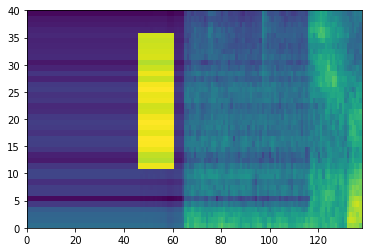

In [13]:
Xs, yss = next(multi.train_generator)
multi_preds = model.predict(Xs)
print(np.array([[np.argmax(pred) for pred in preds] for preds in multi_preds] + [[np.argmax(y) for y in ys] for ys in yss]))
plot_dataset(Xs)